# HuggingFace Transformers

HuggingFace is a company that provides state-of-the-art Machine Learning models and tools to help researchers, developers, and practitioners to build, train, and deploy NLP models in a fast and easy way. They offer a wide range of models and tools, including models for sentiment analysis, question answering, text classification, language translation, and more.

One of the key offerings from HuggingFace is the `transformers` library, which is a comprehensive library for state-of-the-art NLP models, including models from leading Machine Learning research organizations such as Google, OpenAI, and Microsoft. The `transformers` library is built on top of the `huggingface_hub` library, which is a platform for managing and sharing Machine Learning models.

With the `transformers` library, you can easily access and use a wide range of NLP models, including BERT, GPT-2, RoBERTa, XLNet, and more. The library also provides pre-trained models for various NLP tasks, including text classification, sentiment analysis, named entity recognition, and more.

Additionally, the `transformers` library provides a pipeline API that makes it easy to perform multiple NLP tasks in a single line of code. The pipeline API allows you to perform text preprocessing, tokenization, and prediction in a single function call, making it easy to build NLP models and perform NLP tasks quickly and efficiently.

Overall, HuggingFace and its libraries, including the `transformers` library and the `huggingface_hub` library, are valuable resources for anyone working in NLP and machine learning. Whether you're a researcher, developer, or practitioner, you'll find the tools and models provided by HuggingFace to be powerful and useful in building and deploying NLP models.

References:
- [HuggingFace](https://huggingface.co/)
- [HuggingFace Transformers](https://huggingface.co/transformers/)
- [HuggingFace Hub](https://huggingface.co/hub/)
- [HuggingFace Transformers Documentation](https://huggingface.co/transformers/index.html)


In [ ]:
# If you're running this notebook on Colab, run the following cell to install the required libraries
!pip install transformers gradio timm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import gradio as gr
from transformers import pipeline, Conversation
from PIL import Image  # for image processing
import requests  # for downloading images

## Introduction to Transformers Pipelines <a name="introduction"></a>
[Back to Top](#toc)

Transformers Pipelines are a high-level API provided by the `transformers` library that make it easy to perform multiple ML tasks with a single function call. The pipelines API allows you to perform text preprocessing, tokenization, and prediction in a single function call, making it easy to build ML models and perform ML tasks quickly and efficiently.

With the pipelines API, you can easily perform tasks such as text classification, sentiment analysis, named entity recognition, question answering, and more, without having to write any code. The pipelines API is designed to be easy to use and is ideal for beginners who are new to ML and machine learning.

In addition to being easy to use, the pipelines API is also highly customizable. You can fine-tune the models provided by the `transformers` library to meet the specific needs of your ML tasks, or you can train your own models from scratch. The pipelines API also supports multiple NLP models, including BERT, GPT-2, RoBERTa and computer vision models, including ResNet, VGG, and more.

Currently available pipelines include:
- NLP Pipelines
  - Text Classification (e.g. sentiment analysis)
  - Token Classification (e.g. named entity recognition)
  - Text Generation (e.g. summarization)
  - Conversation (e.g. chatbots)
- Computer Vision Pipeline
  - Image Classification
  - Image Segmentation
  - Object Detection
  - Image Feature Extraction

For a list of all available pipelines, see the [documentation](https://huggingface.co/transformers/main_classes/pipelines.html).

## NLP Tasks

### Sentiment Analysis

Sentiment analysis is a common NLP task that involves classifying the sentiment of a given text. Sentiment analysis is useful for understanding the overall sentiment of a given text, which can be used to determine whether the text is positive, negative, or neutral.

In [ ]:
sa_eng = pipeline("sentiment-analysis")  # English sentiment analysis pipeline


def sa_eng_func(text):
    result = sa_eng(text)
    output = f"{result[0]['label']} {result[0]['score']}"
    return output


gr.Interface(sa_eng_func, inputs="text", outputs="text").launch()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
sa_ar = pipeline(
    "sentiment-analysis", model="CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"
)


def sa_ar_func(text):
    result = sa_ar(text)
    output = f"{result[0]['label']} {result[0]['score']}"
    return output


gr.Interface(sa_ar_func, inputs="text", outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Token Classification

In [ ]:
ner = pipeline(
    model="Jean-Baptiste/roberta-large-ner-english", aggregation_strategy="simple"
)
ner("Hi my name is John and I work at Google in San Fransisco")

In [ ]:
def prepare_highlighted_text(input, results):
    output = {"text": input, "entities": []}

    for r in results:
        ent = {}
        ent["entity"] = r["entity_group"]
        ent["start"] = r["start"]
        ent["end"] = r["end"]

        output["entities"].append(ent)
    return output

In [ ]:
def extract_ner(text):
    results = ner(text)
    output = prepare_highlighted_text(text, results)
    return output


gr.Interface(
    fn=extract_ner,
    inputs=gr.inputs.Textbox(label="Sentence"),
    outputs=gr.outputs.HighlightedText(label="NERs"),
).launch(debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:240: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [ ]:
pos = pipeline(
    model="vblagoje/bert-english-uncased-finetuned-pos", aggregation_strategy="simple"
)
pos("My name is Ahmed")

[{'entity_group': 'PRON',
  'score': 0.99939275,
  'word': 'my',
  'start': 0,
  'end': 2},
 {'entity_group': 'NOUN',
  'score': 0.99653697,
  'word': 'name',
  'start': 3,
  'end': 7},
 {'entity_group': 'AUX',
  'score': 0.9951696,
  'word': 'is',
  'start': 8,
  'end': 10},
 {'entity_group': 'PROPN',
  'score': 0.9987915,
  'word': 'ahmed',
  'start': 11,
  'end': 16}]

In [ ]:
def extract_pos(text):
    results = pos(text)
    outputs = prepare_highlighted_text(text, results)
    return outputs


gr.Interface(
    fn=extract_pos,
    inputs=gr.inputs.Textbox(label="Sentence"),
    outputs=gr.outputs.HighlightedText(label="Part of Speech Tagging"),
).launch(debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:240: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


### Text Summerization

In [ ]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
input = """
World War II or the Second World War, often abbreviated as WWII or WW2, was a global conflict that lasted from 1939 to 1945. The vast majority of the world's countries, including all of the great powers, fought as part of two opposing military alliances: the Allies (led by the Soviet Union, United Kingdom, United States and China) and the Axis (led by Germany, Japan, and Italy). Many participants threw their economic, industrial, and scientific capabilities behind this total war, blurring the distinction between civilian and military resources. Aircraft played a major role, enabling the strategic bombing of population centres and the delivery of the only two nuclear weapons ever used in war.

World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities, mostly among civilians. Tens of millions died due to genocides (including the Holocaust), starvation, massacres, and disease. In the wake of the Axis defeat, Germany and Japan were occupied, and war crimes tribunals were conducted against German and Japanese leaders.

The causes of World War II are debated, but contributing factors included the Second Italo-Ethiopian War, Spanish Civil War, Second Sino-Japanese War, Soviet–Japanese border conflicts, rise of fascism in Europe and rising European tensions since World War I. World War II is generally considered to have begun on 1 September 1939, when Nazi Germany, under Adolf Hitler, invaded Poland. The United Kingdom and France subsequently declared war on Germany on 3 September. Under the Molotov–Ribbentrop Pact of August 1939, Germany and the Soviet Union had partitioned Poland and marked out their "spheres of influence" across Finland, Estonia, Latvia, Lithuania and Romania. From late 1939 to early 1941, in a series of campaigns and treaties, Germany conquered or controlled much of continental Europe, and formed the Axis alliance with Italy and Japan (with other countries later). Following the onset of campaigns in North Africa and East Africa, and the fall of France in mid-1940, the war continued primarily between the European Axis powers and the British Empire, with war in the Balkans, the aerial Battle of Britain, the Blitz of the United Kingdom, and the Battle of the Atlantic. On 22 June 1941, Germany led the European Axis powers in an invasion of the Soviet Union, opening the Eastern Front, the largest land theatre of war in history.
"""

len(input.split())

390

In [ ]:
summarizer(
    """
World War II or the Second World War, often abbreviated as WWII or WW2, was a global conflict that lasted from 1939 to 1945. The vast majority of the world's countries, including all of the great powers, fought as part of two opposing military alliances: the Allies (led by the Soviet Union, United Kingdom, United States and China) and the Axis (led by Germany, Japan, and Italy). Many participants threw their economic, industrial, and scientific capabilities behind this total war, blurring the distinction between civilian and military resources. Aircraft played a major role, enabling the strategic bombing of population centres and the delivery of the only two nuclear weapons ever used in war.

World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities, mostly among civilians. Tens of millions died due to genocides (including the Holocaust), starvation, massacres, and disease. In the wake of the Axis defeat, Germany and Japan were occupied, and war crimes tribunals were conducted against German and Japanese leaders.

The causes of World War II are debated, but contributing factors included the Second Italo-Ethiopian War, Spanish Civil War, Second Sino-Japanese War, Soviet–Japanese border conflicts, rise of fascism in Europe and rising European tensions since World War I. World War II is generally considered to have begun on 1 September 1939, when Nazi Germany, under Adolf Hitler, invaded Poland. The United Kingdom and France subsequently declared war on Germany on 3 September. Under the Molotov–Ribbentrop Pact of August 1939, Germany and the Soviet Union had partitioned Poland and marked out their "spheres of influence" across Finland, Estonia, Latvia, Lithuania and Romania. From late 1939 to early 1941, in a series of campaigns and treaties, Germany conquered or controlled much of continental Europe, and formed the Axis alliance with Italy and Japan (with other countries later). Following the onset of campaigns in North Africa and East Africa, and the fall of France in mid-1940, the war continued primarily between the European Axis powers and the British Empire, with war in the Balkans, the aerial Battle of Britain, the Blitz of the United Kingdom, and the Battle of the Atlantic. On 22 June 1941, Germany led the European Axis powers in an invasion of the Soviet Union, opening the Eastern Front, the largest land theatre of war in history.
"""
)

[{'summary_text': ' World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities . The causes of the conflict are debated, but contributing factors included the Second Italo-Ethiopian War, Second Sino-Japanese War, rise of European tensions and rising European tensions .'}]

### Chatbot

In [ ]:
chatbot = pipeline(model="microsoft/DialoGPT-large")

In [ ]:
conversation = Conversation(
    "I'm going to the movies tonight, any suggestion for good movies"
)

In [ ]:
def preview_conversation(conversation):
    print("ID:", conversation.uuid)
    print("Current Input:", conversation.new_user_input)
    print(
        "Past Conversation:",
        list(zip(conversation.past_user_inputs, conversation.generated_responses)),
    )


preview_conversation(conversation)

ID: 88ae857b-6112-4fe6-b28e-5d8254d0b015
Current Input: I'm going to the movies tonight, any suggestion for good movies
Past Conversation: []


In [ ]:
chatbot(conversation)
preview_conversation(conversation)

ID: 88ae857b-6112-4fe6-b28e-5d8254d0b015
Current Input: None
Past Conversation: [("I'm going to the movies tonight, any suggestion for good movies", ' What kind of movies do you like? I like action, comedy, and thrillers.')]


In [ ]:
conversation.add_user_input("Can you suggest a comedy instead?")
preview_conversation(conversation)

ID: 88ae857b-6112-4fe6-b28e-5d8254d0b015
Current Input: Can you suggest a comedy instead?
Past Conversation: [("I'm going to the movies tonight, any suggestion for good movies", ' What kind of movies do you like? I like action, comedy, and thrillers.')]


In [ ]:
chatbot(conversation)
preview_conversation(conversation)

ID: 88ae857b-6112-4fe6-b28e-5d8254d0b015
Current Input: None
Past Conversation: [("I'm going to the movies tonight, any suggestion for good movies", ' What kind of movies do you like? I like action, comedy, and thrillers.'), ('Can you suggest a comedy instead?', ' I like comedies, but I also like action and thriller movies as well. What is your favorite movie?')]


In [ ]:
def greeting_bot(input, history):
    # if history is null/None (first run), intialize history
    if not history:
        history = []

    # generate response
    response = f"Hello {input}"

    # format it as a tuple (that's how Gradio wants it)
    output = (input, response)

    # update history
    history.append(output)

    return history, history


gr.Interface(
    fn=greeting_bot,
    inputs=[gr.inputs.Textbox(label="Your message"), gr.inputs.State()],
    outputs=[gr.outputs.Chatbot(), gr.outputs.State()],
).launch(debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:448: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import this component as gr.State() from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:309: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/us

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [ ]:
chatbot = pipeline(model="facebook/blenderbot-400M-distill")

In [ ]:
def dialogpt(input, history):  # history = conversation
    # if history not found, initalize it
    if not history:
        history = Conversation(input)  # this code will only run once per session
    else:  # if there was already a conversation
        history.add_user_input(input)

    chatbot(history)

    user_inputs = history.past_user_inputs
    responses = history.generated_responses

    output = list(zip(user_inputs, responses))

    print(output)

    return output, history


gr.Interface(
    dialogpt,
    inputs=[gr.inputs.Textbox(label="Your message"), gr.inputs.State()],
    outputs=[gr.outputs.Chatbot(label="blenderbot"), gr.outputs.State()],
).launch(debug=True, share=True)

## Computer Vision

## Image Classification

In [ ]:
img_classification = pipeline("image-classification", model="microsoft/resnet-50")

/usr/local/lib/python3.8/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


In [ ]:
img_classification(
    "https://www.thoughtco.com/thmb/OqANUu4U3tNL1Uo2n19uX6PzbM8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/red_kangaroo-24c18ab08dc145f1a798abd4b820390a.jpg"
)

[{'score': 0.9997605681419373, 'label': 'wallaby, brush kangaroo'},
 {'score': 1.0197721167060081e-05, 'label': 'potpie'},
 {'score': 9.751374818733893e-06,
  'label': 'rock python, rock snake, Python sebae'},
 {'score': 6.4654827838239726e-06, 'label': 'modem'},
 {'score': 4.489473667490529e-06, 'label': 'triceratops'}]

In [ ]:
def classify_image(img):
    img = Image.fromarray(img)
    results = img_classification(img)

    labels = {}

    for result in results:
        labels[result["label"]] = result["score"]

    return labels


gr.Interface(
    classify_image,
    inputs=gr.inputs.Image(label="Upload an image to classify"),
    outputs=gr.outputs.Label(label="Top-5 Probabilities"),
).launch(debug=True, share=True)

### Object Detection

In [ ]:
object_detection = pipeline("object-detection", model="hustvl/yolos-tiny")

/usr/local/lib/python3.8/dist-packages/transformers/models/yolos/feature_extraction_yolos.py:28: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/models/yolos/image_processing_yolos.py:704: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [ ]:
url = "https://predictivehacks.com/wp-content/uploads/2019/10/cycling001-1024x683.jpg"
image = Image.open(requests.get(url, stream=True).raw)

results = object_detection(image)
results

[{'score': 0.9962812066078186,
  'label': 'car',
  'box': {'xmin': 395, 'ymin': 243, 'xmax': 696, 'ymax': 397}},
 {'score': 0.9625822901725769,
  'label': 'person',
  'box': {'xmin': 267, 'ymin': 188, 'xmax': 431, 'ymax': 527}},
 {'score': 0.9864896535873413,
  'label': 'bicycle',
  'box': {'xmin': 243, 'ymin': 326, 'xmax': 474, 'ymax': 568}}]

[{'score': 0.9962812066078186,
  'label': 'car',
  'box': {'xmin': 395, 'ymin': 243, 'xmax': 696, 'ymax': 397}},
 {'score': 0.9625822901725769,
  'label': 'person',
  'box': {'xmin': 267, 'ymin': 188, 'xmax': 431, 'ymax': 527}},
 {'score': 0.9864896535873413,
  'label': 'bicycle',
  'box': {'xmin': 243, 'ymin': 326, 'xmax': 474, 'ymax': 568}}]

In [ ]:
def preview_image_bounding_box(image, bounded_boxes, saving_path):
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    ax = plt.gca()

    for result in bounded_boxes:
        box = result["box"]

        xmin = box["xmin"]
        ymin = box["ymin"]
        xmax = box["xmax"]
        ymax = box["ymax"]

        start_point = (xmin, ymin)
        width = xmax - xmin
        height = ymax - ymin

        random_color = np.random.rand(
            3,
        )

        rect = plt.Rectangle(
            start_point, width, height, fill=False, linewidth=5, color=random_color
        )

        plt.text(xmin, ymin, result["label"], color="white", fontsize=22)

        ax.add_patch(rect)

    plt.axis("off")
    plt.savefig(saving_path, dpi=100)

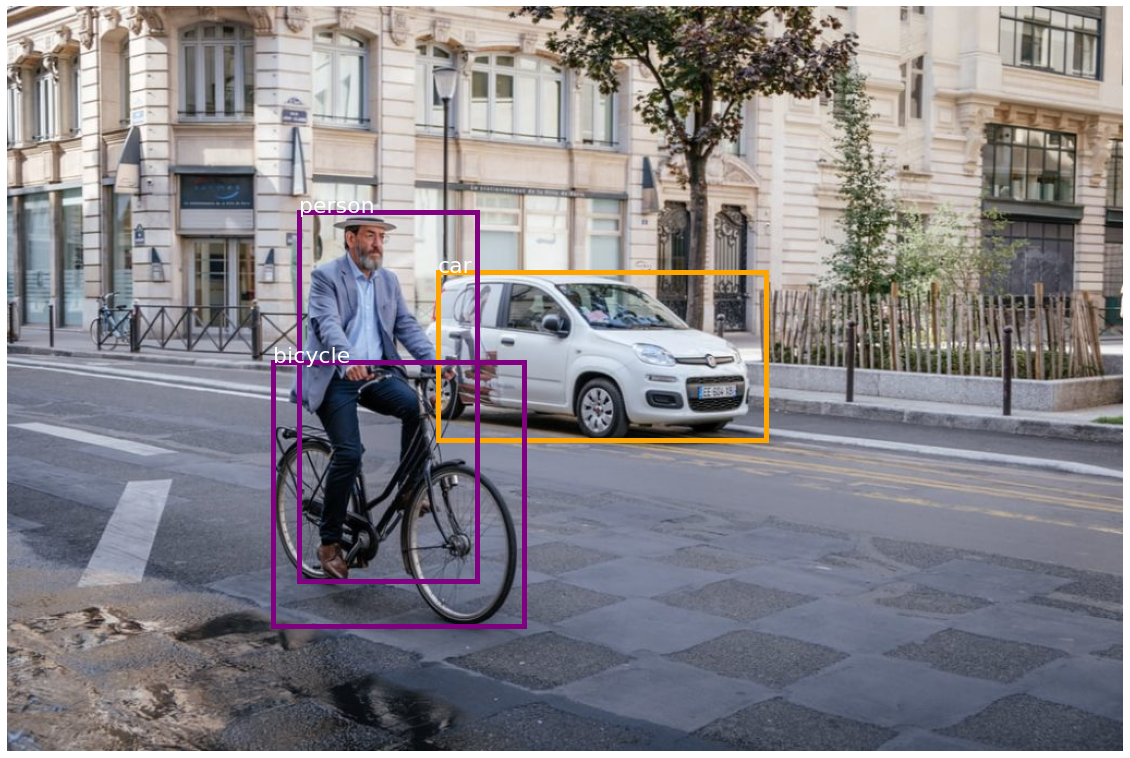

In [ ]:
preview_image_bounding_box(image, results, "test.jpg")

In [ ]:
def detect_objects(image):
    image = Image.fromarray(image)

    results = object_detection(image)

    preview_image_bounding_box(image, results, "temp.jpg")

    return "temp.jpg"


gr.Interface(
    detect_objects, inputs=gr.inputs.Image(), outputs=gr.outputs.Image("filepath")
).launch(debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>